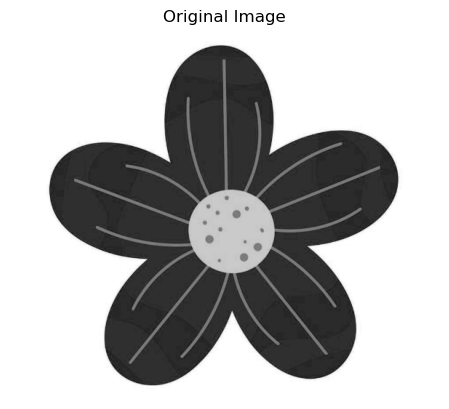

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read grayscale image
img = cv2.imread(r'C:\Users\LENOVO\OneDrive\Desktop\miranda\b.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

1-D Convolution Example

In [5]:
# 1D convolution example
signal = np.array([2, 3, 4, 5, 6])
kernel = np.array([1, 0, -1])  # edge-detect pattern

# Flip kernel (convolution property)
kernel_flipped = kernel[::-1]

# Perform 1D convolution manually
result = []
for i in range(len(signal) - len(kernel_flipped) + 1):
    val = np.sum(signal[i:i+len(kernel_flipped)] * kernel_flipped)
    result.append(val)

print("1D Convolution result:", result)

1D Convolution result: [2, 2, 2]


2-D Convolution (on image)

In [7]:
def convolution2D(image, kernel):
    m, n = kernel.shape
    pad = m // 2
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros_like(image, dtype=np.float32)

    # Flip kernel (for true convolution)
    kernel = np.flipud(np.fliplr(kernel))

    # Convolve
    for i in range(pad, padded.shape[0]-pad):
        for j in range(pad, padded.shape[1]-pad):
            region = padded[i-pad:i+pad+1, j-pad:j+pad+1]
            output[i-pad, j-pad] = np.sum(region * kernel)

    # Clip result
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)

*Apply 3×3 Filters

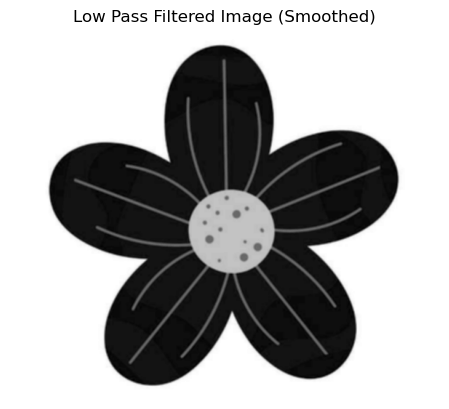

In [8]:
#(a) Low Pass Filter (LPF)
low_pass_kernel = np.ones((3,3), np.float32) / 9

low_pass_img = convolution2D(img, low_pass_kernel)

plt.imshow(low_pass_img, cmap='gray')
plt.title('Low Pass Filtered Image (Smoothed)')
plt.axis('off')
plt.show()

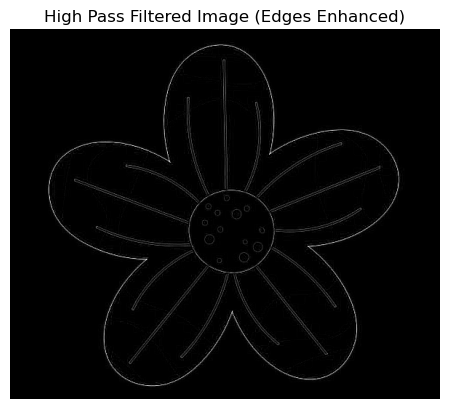

In [9]:
#(b) High Pass Filter (HPF)
high_pass_kernel = np.array([[-1,-1,-1],
                             [-1, 8,-1],
                             [-1,-1,-1]], np.float32)

high_pass_img = convolution2D(img, high_pass_kernel)

plt.imshow(high_pass_img, cmap='gray')
plt.title('High Pass Filtered Image (Edges Enhanced)')
plt.axis('off')
plt.show()

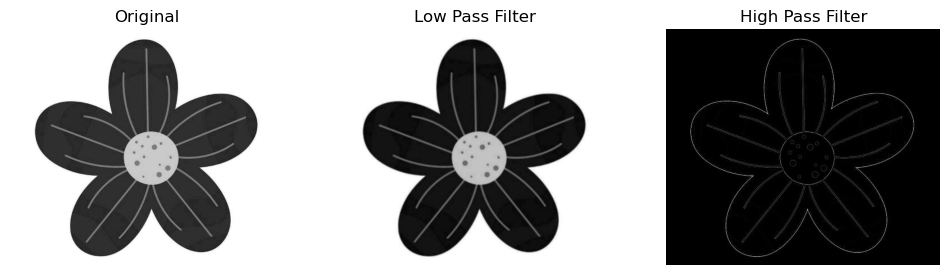

In [10]:
#comparing results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Low Pass Filter")
plt.imshow(low_pass_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("High Pass Filter")
plt.imshow(high_pass_img, cmap='gray')
plt.axis('off')
plt.show()
